# ML Benchmark
**Authors** 
Christopher Metzler, Shehani, Deverell, Malachi Buchheit, Bailey Trip

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm_notebook as tqdm

* Here we read in district level data from the years 2015-2018 (contained in exploratory.csv)

In [2]:
df = pd.read_csv("exploratory.csv", na_values = "?", sep=',', skipinitialspace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19055 entries, 0 to 19054
Data columns (total 62 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Agency Name                                                                     19055 non-null  object
 1   State Name [District] Latest available year                                     19049 non-null  object
 2   Agency Type [District] 2017-18                                                  19051 non-null  object
 3   Agency Type [District] 2016-17                                                  19051 non-null  object
 4   Agency Type [District] 2015-16                                                  19051 non-null  object
 5   School District Level Code (SCHLEV) [District Finance] 2017-18                  19051 non-null  object
 6   School District Level 

* Begin data cleaning for all years by filling NaN's with value 0

In [3]:
#Check for NA values
print(df.isna().sum())
#drop existing NA values
df.fillna(value=0,inplace=True)

Agency Name                                                                0
State Name [District] Latest available year                                6
Agency Type [District] 2017-18                                             4
Agency Type [District] 2016-17                                             4
Agency Type [District] 2015-16                                             4
                                                                          ..
Local Rev. - Property Taxes (T06) [District Finance] 2016-17               4
Local Rev. - Property Taxes (T06) [District Finance] 2015-16               4
Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2017-18    4
Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2016-17    4
Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2015-16    4
Length: 62, dtype: int64


In [4]:
#Verify Results
print(df.isna().sum())

Agency Name                                                                0
State Name [District] Latest available year                                0
Agency Type [District] 2017-18                                             0
Agency Type [District] 2016-17                                             0
Agency Type [District] 2015-16                                             0
                                                                          ..
Local Rev. - Property Taxes (T06) [District Finance] 2016-17               0
Local Rev. - Property Taxes (T06) [District Finance] 2015-16               0
Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2017-18    0
Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2016-17    0
Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2015-16    0
Length: 62, dtype: int64


Here we split the data into 3 smaller dataframes
* 2015-16 will be used as training data
* 2016-18 will be used as testing data

In [5]:
#Split the data into years 2015-16, 2016-17 and 2017-18
years_15_16 = df[['Agency Name', 'State Name [District] Latest available year', 'Agency Type [District] 2015-16', 'School District Level Code (SCHLEV) [District Finance] 2015-16', 'Urban-centric Locale [District] 2015-16','Total Students All Grades (Includes AE) [District] 2015-16','American Indian/Alaska Native Students [District] 2015-16', 'Hispanic Students [District] 2015-16','Asian or Asian/Pacific Islander Students [District] 2015-16','Black or African American Students [District] 2015-16','White Students [District] 2015-16','Two or More Races Students [District] 2015-16','Nat. Hawaiian or Other Pacific Isl. Students [District] 2015-16','Total Race/Ethnicity [District] 2015-16','Pupil/Teacher Ratio [District] 2015-16','Total Staff [District] 2015-16','Total General Revenue (TOTALREV) [District Finance] 2015-16','Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2015-16','Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2015-16','State Rev. - General Formula Assistance (C01) [District Finance] 2015-16','Local Rev. - Property Taxes (T06) [District Finance] 2015-16','Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2015-16']].copy()
#years_15_16.info()

years_16_17 = df[['Agency Name', 'State Name [District] Latest available year', 'Agency Type [District] 2016-17', 'School District Level Code (SCHLEV) [District Finance] 2016-17', 'Urban-centric Locale [District] 2016-17','Total Students All Grades (Includes AE) [District] 2016-17','American Indian/Alaska Native Students [District] 2016-17', 'Hispanic Students [District] 2016-17','Asian or Asian/Pacific Islander Students [District] 2016-17','Black or African American Students [District] 2016-17','White Students [District] 2016-17','Two or More Races Students [District] 2016-17','Nat. Hawaiian or Other Pacific Isl. Students [District] 2016-17','Total Race/Ethnicity [District] 2016-17','Pupil/Teacher Ratio [District] 2016-17','Total Staff [District] 2016-17','Total General Revenue (TOTALREV) [District Finance] 2016-17','Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17','Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2016-17','State Rev. - General Formula Assistance (C01) [District Finance] 2016-17','Local Rev. - Property Taxes (T06) [District Finance] 2016-17','Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2016-17']].copy()
#years_16_17.info()

years_17_18 = df[['Agency Name', 'State Name [District] Latest available year', 'Agency Type [District] 2017-18', 'School District Level Code (SCHLEV) [District Finance] 2017-18', 'Urban-centric Locale [District] 2017-18','Total Students All Grades (Includes AE) [District] 2017-18','American Indian/Alaska Native Students [District] 2017-18', 'Hispanic Students [District] 2017-18','Asian or Asian/Pacific Islander Students [District] 2017-18','Black or African American Students [District] 2017-18','White Students [District] 2017-18','Two or More Races Students [District] 2017-18','Nat. Hawaiian or Other Pacific Isl. Students [District] 2017-18','Total Race/Ethnicity [District] 2017-18','Pupil/Teacher Ratio [District] 2017-18','Total Staff [District] 2017-18','Total General Revenue (TOTALREV) [District Finance] 2017-18','Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18','Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2017-18','State Rev. - General Formula Assistance (C01) [District Finance] 2017-18','Local Rev. - Property Taxes (T06) [District Finance] 2017-18','Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2017-18']].copy()
years_17_18.describe()

,Agency Name,State Name [District] Latest available year,Agency Type [District] 2017-18,School District Level Code (SCHLEV) [District Finance] 2017-18,Urban-centric Locale [District] 2017-18,Total Students All Grades (Includes AE) [District] 2017-18,American Indian/Alaska Native Students [District] 2017-18,Hispanic Students [District] 2017-18,Asian or Asian/Pacific Islander Students [District] 2017-18,Black or African American Students [District] 2017-18,White Students [District] 2017-18,Two or More Races Students [District] 2017-18,Nat. Hawaiian or Other Pacific Isl. Students [District] 2017-18,Total Race/Ethnicity [District] 2017-18,Pupil/Teacher Ratio [District] 2017-18,Total Staff [District] 2017-18,Total General Revenue (TOTALREV) [District Finance] 2017-18,Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18,Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2017-18,State Rev. - General Formula Assistance (C01) [District Finance] 2017-18,Local Rev. - Property Taxes (T06) [District Finance] 2017-18,Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2017-18
count,19055,19055,19055,19055,19055,19055,19055,19055,19055,19055,19055,19055,19055,19055,19055,19055,19055,19055,19055,19055,19055,19055
unique,18511,97,11,8,14,5525,547,2526,1195,1979,4248,1088,260,5514,2350,12674,13958,10566,8456,10155,8571,2696
top,DEPARTMENT OF CORRECTIONS,Texas,1-Regular local school district that is NOT a ...,"=""03-Elementary/secondary school system""",21-Suburb: Large,†,"=""0""",†,"=""0""","=""0""",†,†,"=""0""","=""0""",†,–,†,†,"=""0""",†,†,"=""0"""
freq,6,1243,13147,11393,3416,1561,3017,1561,2814,1743,1561,1561,5397,1619,2763,1185,1510,2587,5620,1510,6517,2483


- Here we created labels for each year's real value columns
- We then converted the string data by applying to_numeric. 
- Setting errors to coerce converts the data into NaN's which we later fill with 0.

In [6]:
#Set real labels
realcol_2015_16 = ['Total Students All Grades (Includes AE) [District] 2015-16','American Indian/Alaska Native Students [District] 2015-16', 'Hispanic Students [District] 2015-16','Asian or Asian/Pacific Islander Students [District] 2015-16','Black or African American Students [District] 2015-16','White Students [District] 2015-16','Two or More Races Students [District] 2015-16','Nat. Hawaiian or Other Pacific Isl. Students [District] 2015-16','Total Race/Ethnicity [District] 2015-16','Pupil/Teacher Ratio [District] 2015-16','Total Staff [District] 2015-16','Total General Revenue (TOTALREV) [District Finance] 2015-16','Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2015-16','State Rev. - General Formula Assistance (C01) [District Finance] 2015-16','Local Rev. - Property Taxes (T06) [District Finance] 2015-16','Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2015-16']
realcol_2016_17 = ['Total Students All Grades (Includes AE) [District] 2016-17','American Indian/Alaska Native Students [District] 2016-17', 'Hispanic Students [District] 2016-17','Asian or Asian/Pacific Islander Students [District] 2016-17','Black or African American Students [District] 2016-17','White Students [District] 2016-17','Two or More Races Students [District] 2016-17','Nat. Hawaiian or Other Pacific Isl. Students [District] 2016-17','Total Race/Ethnicity [District] 2016-17','Pupil/Teacher Ratio [District] 2016-17','Total Staff [District] 2016-17','Total General Revenue (TOTALREV) [District Finance] 2016-17','Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2016-17','State Rev. - General Formula Assistance (C01) [District Finance] 2016-17','Local Rev. - Property Taxes (T06) [District Finance] 2016-17','Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2016-17']
realcol_2017_18 = ['Total Students All Grades (Includes AE) [District] 2017-18','American Indian/Alaska Native Students [District] 2017-18', 'Hispanic Students [District] 2017-18','Asian or Asian/Pacific Islander Students [District] 2017-18','Black or African American Students [District] 2017-18','White Students [District] 2017-18','Two or More Races Students [District] 2017-18','Nat. Hawaiian or Other Pacific Isl. Students [District] 2017-18','Total Race/Ethnicity [District] 2017-18','Pupil/Teacher Ratio [District] 2017-18','Total Staff [District] 2017-18','Total General Revenue (TOTALREV) [District Finance] 2017-18','Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2017-18','State Rev. - General Formula Assistance (C01) [District Finance] 2017-18','Local Rev. - Property Taxes (T06) [District Finance] 2017-18','Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2017-18']

#Continue cleaning data to account for uninterpretable strings
years_15_16[realcol_2015_16] = years_15_16[realcol_2015_16].apply(pd.to_numeric, errors='coerce') #Converts uninterpretable data into NaN's
#years_15_16.fillna(years_15_16[realcol_2015_16].mean(), inplace=True) #Convert NaN's into  mean
years_15_16.fillna(0, inplace=True) #Convert NaN's into interpretable data
#print(years_15_16.head(5))

years_16_17[realcol_2016_17] = years_16_17[realcol_2016_17].apply(pd.to_numeric, errors='coerce') #Converts uninterpretable data into NaN's
#years_16_17.fillna(years_16_17[realcol_2016_17].mean(), inplace=True) #Convert NaN's into  mean
years_16_17.fillna(0, inplace=True) #Convert NaN's into interpretable data
#print(years_16_17.head(5))

years_17_18[realcol_2017_18] = years_17_18[realcol_2017_18].apply(pd.to_numeric, errors='coerce') #Converts uninterpretable data into NaN's
#years_17_18.fillna(years_17_18[realcol_2017_18].mean(), inplace=True) #Convert NaN's into  mean
years_17_18.fillna(0, inplace=True) #Convert NaN's into interpretable data
#print(years_17_18.head(5))

Poverty Labels were created using the formula:
* less than 10,000 total revenue per pupil = Strict Poverty
* less than 15,000 total revenue per pupil = High Poverty
* greater than 15,000 total revenue per pupil = No Poverty

We also combined them into one poverty column

We then dropped the revenue columns and columns used in creating our poverty label.

The last line of code is for the display of our correlation chart

In [7]:
years_15_16['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2015-16'] = years_15_16['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2015-16'].apply(pd.to_numeric, errors='coerce') #Converts uninterpretable data into NaN's
years_15_16.fillna(0, inplace=True) #Convert NaN's into interpretable data
years_15_16['cStrict Poverty'] = years_15_16['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2015-16'] < 10000
years_15_16['bHigh Poverty'] = years_15_16['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2015-16'] < 15000
years_15_16['aNo Poverty'] = years_15_16['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2015-16'] > 15000
years_15_16['bHigh Poverty'].where(years_15_16['cStrict Poverty'] == False, other=False, inplace=True)
years_15_16['bHigh Poverty'].fillna(value=False, inplace=True)
years_15_16['Poverty Level'] = years_15_16.loc[:,['cStrict Poverty', 'bHigh Poverty', 'aNo Poverty']].eq(True).idxmax(axis=1).astype('category').cat.codes

years_16_17['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17'] = years_16_17['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17'].apply(pd.to_numeric, errors='coerce') #Converts uninterpretable data into NaN's
years_16_17.fillna(0, inplace=True) #Convert NaN's into interpretable data
years_16_17['cStrict Poverty'] = years_16_17['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17'] < 10000
years_16_17['bHigh Poverty'] = years_16_17['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17'] < 15000
years_16_17['aNo Poverty'] = years_16_17['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17'] > 15000
years_16_17['bHigh Poverty'].where(years_16_17['cStrict Poverty'] == False, other=False, inplace=True)
years_16_17['bHigh Poverty'].fillna(value=False, inplace=True)
years_16_17['Poverty Level'] = years_16_17.loc[:,['cStrict Poverty', 'bHigh Poverty', 'aNo Poverty']].eq(True).idxmax(axis=1).astype('category').cat.codes

years_17_18['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18'] = years_17_18['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18'].apply(pd.to_numeric, errors='coerce') #Converts uninterpretable data into NaN's
years_17_18.fillna(0, inplace=True) #Convert NaN's into interpretable data
years_17_18['cStrict Poverty'] = years_17_18['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18'] < 10000
years_17_18['bHigh Poverty'] = years_17_18['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18'] < 15000
years_17_18['aNo Poverty'] = years_17_18['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18'] > 15000
years_17_18['bHigh Poverty'].where(years_17_18['cStrict Poverty'] == False, other=False, inplace=True)
years_17_18['bHigh Poverty'].fillna(value=False, inplace=True)
years_17_18['Poverty Level'] = years_17_18.loc[:,['cStrict Poverty', 'bHigh Poverty', 'aNo Poverty']].eq(True).idxmax(axis=1).astype('category').cat.codes

#Remove labels used
years_15_16.drop(labels=['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2015-16','cStrict Poverty', 'bHigh Poverty', 'aNo Poverty'], axis=1, inplace=True)
years_16_17.drop(labels=['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17','cStrict Poverty', 'bHigh Poverty', 'aNo Poverty'], axis=1, inplace=True)
years_17_18.drop(labels=['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18','cStrict Poverty', 'bHigh Poverty', 'aNo Poverty'], axis=1, inplace=True)

new_years_15_16 = years_15_16[['School District Level Code (SCHLEV) [District Finance] 2015-16', 'Urban-centric Locale [District] 2015-16','Total Students All Grades (Includes AE) [District] 2015-16','American Indian/Alaska Native Students [District] 2015-16', 'Hispanic Students [District] 2015-16','Asian or Asian/Pacific Islander Students [District] 2015-16','Black or African American Students [District] 2015-16','White Students [District] 2015-16','Two or More Races Students [District] 2015-16','Nat. Hawaiian or Other Pacific Isl. Students [District] 2015-16','Poverty Level']].copy()

Data normalization was done over real value columns using z-score formula

In [8]:
#Begin normalization for 2015-2016
for col in realcol_2015_16:
    mean = years_15_16[col].mean()
    std = years_15_16[col].std()
    years_15_16[col] = (years_15_16[col] - mean)/std

#Begin normalization for 2016-2017
for col in realcol_2016_17:
    mean = years_16_17[col].mean()
    std = years_16_17[col].std()
    years_16_17[col] = (years_16_17[col] - mean)/std

#Begin normalization for 2017-2018
for col in realcol_2017_18:
    mean = years_17_18[col].mean()
    std = years_17_18[col].std()
    years_17_18[col] = (years_17_18[col] - mean)/std

Plot the correlation chart using seaborn and our dataframe created during label creation.

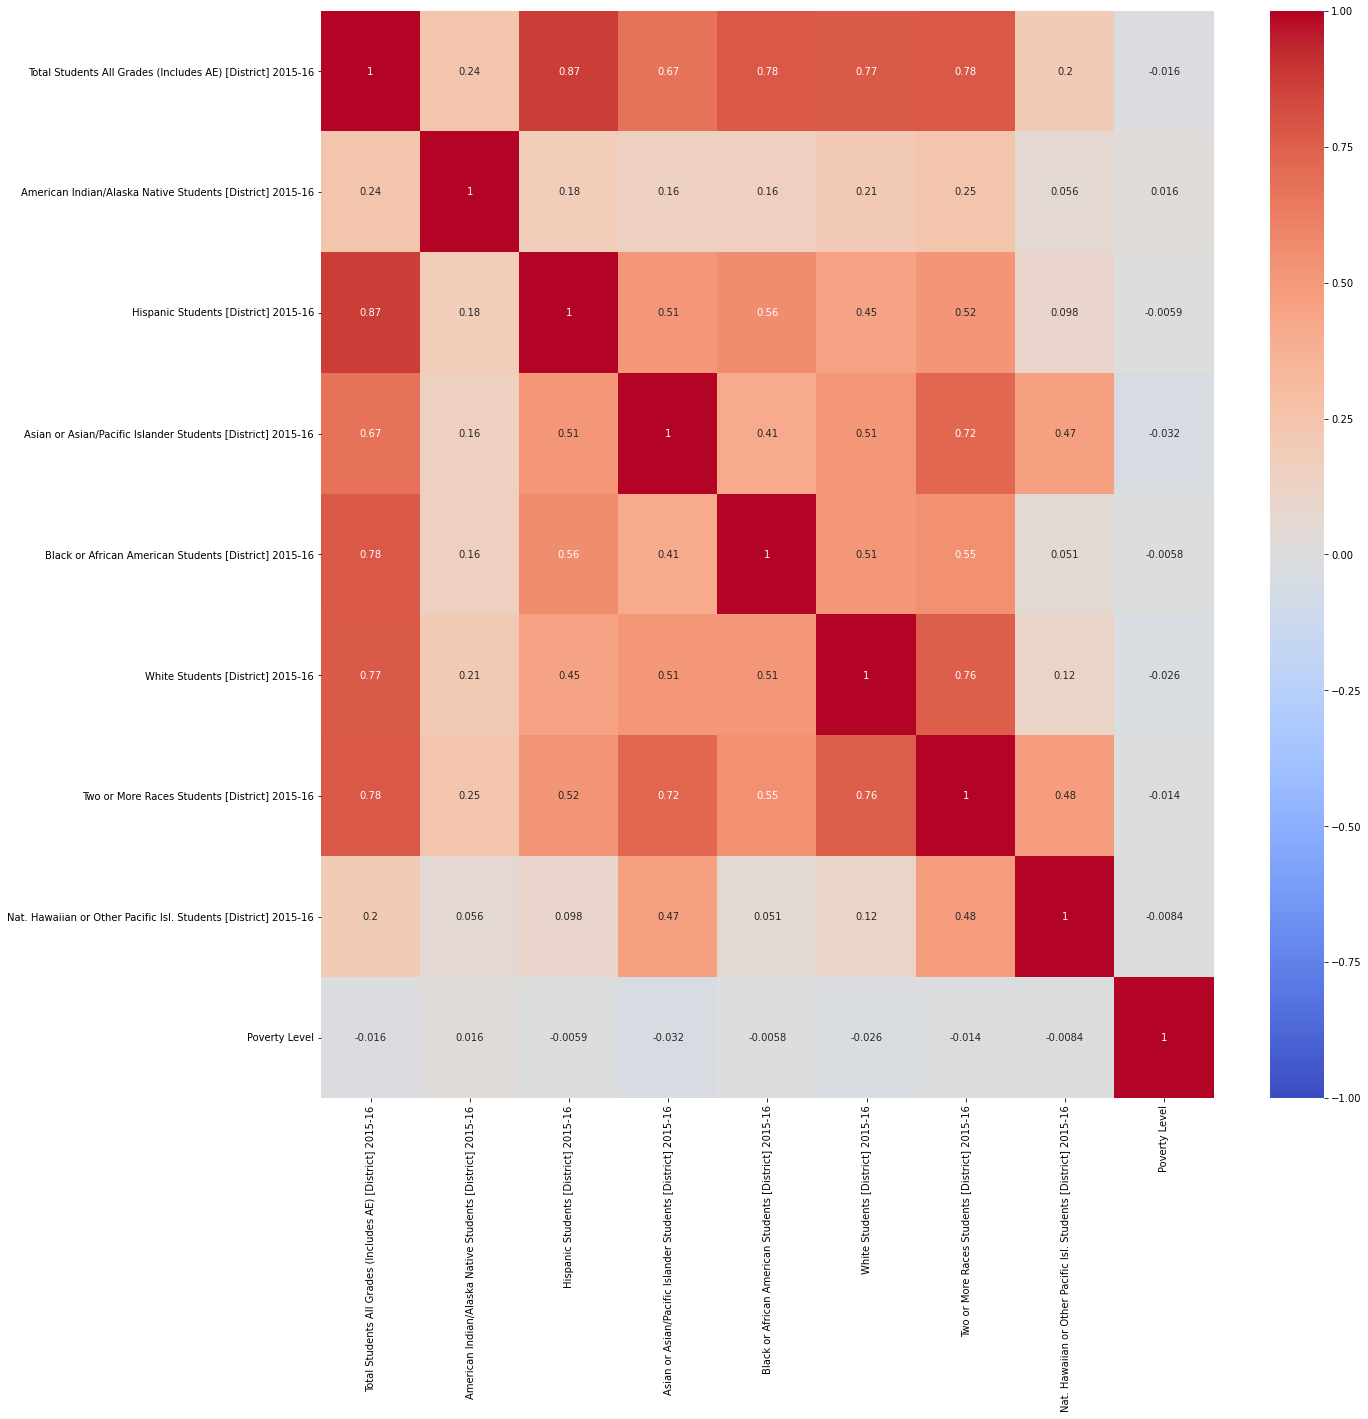

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(new_years_15_16.corr(),annot=True,cmap='coolwarm',vmin=-1)

- Set catagorical columns into dummy variables.

In [10]:
col_2015_16 = ["Agency Type [District] 2015-16", "School District Level Code (SCHLEV) [District Finance] 2015-16", "Urban-centric Locale [District] 2015-16"]
col_2016_17 = ["Agency Type [District] 2016-17", "School District Level Code (SCHLEV) [District Finance] 2016-17", "Urban-centric Locale [District] 2016-17"]
col_2017_18 = ["Agency Type [District] 2017-18", "School District Level Code (SCHLEV) [District Finance] 2017-18", "Urban-centric Locale [District] 2017-18"]

years_15_16 = pd.get_dummies(years_15_16, columns=col_2015_16)
years_16_17 = pd.get_dummies(years_16_17, columns=col_2016_17)
years_17_18 = pd.get_dummies(years_17_18, columns=col_2017_18)


- After analyzing the heatmap it was observed that the Asian or Pacific Islander column is in most negative correlation while the American Indian/Alaskan native students column is in most postive correlation with the poverty column.

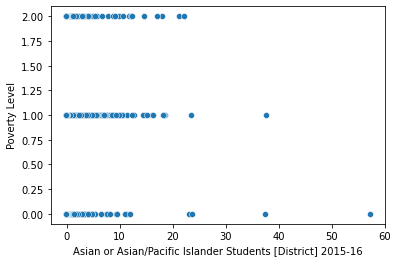

In [11]:
sns.scatterplot(data=years_15_16, x="Asian or Asian/Pacific Islander Students [District] 2015-16", y="Poverty Level")

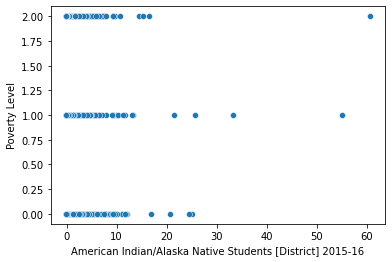

In [12]:
sns.scatterplot(data=years_15_16, x="American Indian/Alaska Native Students [District] 2015-16", y="Poverty Level")

For feature selection we removed the names and other revenue columns from all dataframes

In [13]:
col_remove = ['Agency Name', 'State Name [District] Latest available year']

col_remove_2017_18 = ['Total General Revenue (TOTALREV) [District Finance] 2017-18','Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2017-18','State Rev. - General Formula Assistance (C01) [District Finance] 2017-18', 'Local Rev. - Property Taxes (T06) [District Finance] 2017-18',
       'Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2017-18']
years_17_18.drop(columns=col_remove+col_remove_2017_18, inplace=True)

col_remove_2016_17 = []
for col in col_remove_2017_18:
    col_remove_2016_17.append(col[:-7]+"2016-17")
years_16_17.drop(columns=col_remove+col_remove_2016_17, inplace=True)

col_remove_2015_16 = []
for col in col_remove_2017_18:
    col_remove_2015_16.append(col[:-7]+"2015-16")
years_15_16.drop(columns=col_remove+col_remove_2015_16, inplace=True)

Dropped additional labels unique to 2016-18 dataframes

In [14]:
years_16_17.drop(labels='Agency Type [District] 2016-17_9-Specialized public school district', axis=1, inplace=True)
years_17_18.drop(labels='Agency Type [District] 2017-18_9-Specialized public school district', axis=1, inplace=True)

Here we train test and split our data.
* y, y1, y2 is assigned same label: Poverty
* x is assigned 2015-16 (Training data)
* x1 and x2 are assigned 2016-17 and 2017-18 respectively (Test data)

In [15]:
warnings.filterwarnings("ignore") #for cleanup of code output

# Assign values to y
lab_col = ['Poverty Level']

y = years_15_16[lab_col].values
y1 = years_16_17[lab_col].values
y2 = years_17_18[lab_col].values

# Drop column from data frame
years_15_16.drop(columns=lab_col, inplace=True)
years_16_17.drop(columns=lab_col, inplace=True)
years_17_18.drop(columns=lab_col, inplace=True)

# Assign predictor values to x
x = years_15_16.values
x1 = years_16_17.values
x2 = years_17_18.values

print(x.shape, y.shape)
print(x1.shape, y1.shape)
print(x2.shape, y2.shape)

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state=1)
x1train, x1test, y1train, y1test = train_test_split(x1,y1, test_size = 0.2, random_state=1)
x2train, x2test, y2train, y2test = train_test_split(x2,y2, test_size = 0.2, random_state=1)

(19055, 43) (19055, 1)
(19055, 43) (19055, 1)
(19055, 43) (19055, 1)


- Followed by standardized copies of our train/test data

In [16]:
std_scale = preprocessing.StandardScaler().fit(xtrain)
x_train_std = std_scale.transform(xtrain)
x_test_std  = std_scale.transform(xtest)
x1_train_std = std_scale.transform(x1train)
x1_test_std  = std_scale.transform(x1test)
x2_train_std = std_scale.transform(x2train)
x2_test_std  = std_scale.transform(x2test)

* KNN classification model evaluated with k = 3

In [17]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(xtrain,ytrain)
print(knn.score(xtest, ytest))

0.6866964051430071


* Here we optimize k through a return score function.

[0.6688533193387562, 0.6504854368932039, 0.6866964051430071, 0.6906323799527683, 0.7084754657570191, 0.7090002623983207, 0.7160850170558909, 0.7105746523222252, 0.7150354237732879, 0.7147730254526371, 0.7137234321700341, 0.7145106271319863, 0.7147730254526371, 0.7171346103384938, 0.7176594069797954, 0.717921805300446, 0.7184466019417476, 0.7192337969036998, 0.7213329834689058, 0.7202833901863028, 0.7192337969036998, 0.718971398583049, 0.7205457885069536, 0.7197585935450013, 0.7210705851482551]
BESt VALUE OF K 19


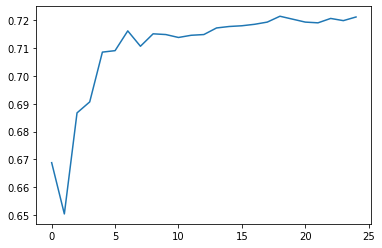

In [18]:
def returnScore(k, xtrain, xtest, ytrain, ytest):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(xtrain, ytrain)
  return knn.score(xtest, ytest)


result = [*map(lambda i:returnScore(i+1,xtrain, xtest, ytrain, ytest), range(0,25))]
print(result)
plt.plot(result)


print('BESt VALUE OF K', np.argmax(result) + 1 )


bestknn = KNeighborsClassifier(n_neighbors=(np.argmax(result) + 1))

bestknn.fit(xtrain, ytrain)
bestknn.score(xtest, ytest)


ypred = bestknn.predict(xtest)

* Using best parameters k = 19 and outputting score for our test data.

In [19]:
knn = KNeighborsClassifier(n_neighbors = 19)

knn.fit(xtrain,ytrain)
kscore1 = knn.score(x1train, y1train)
kscore2 = knn.score(x2train, y2train)

print(kscore1, kscore2)

0.6639333508265547 0.6393991078457097


Decision Tree model done with max depth 10 and splitter set to best for intitial evaluation

* Includes code to output pdf of tree for analyzing

(0.7765678299658882, 0.7299921280503805)


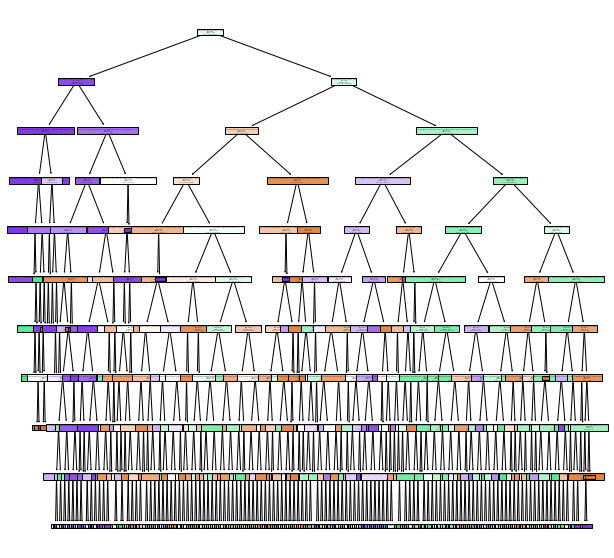

In [20]:
dtc = tree.DecisionTreeClassifier(max_depth=10, splitter="best")
dtc.fit(xtrain, ytrain)

fig = plt.figure(figsize=(10,10))
tree.plot_tree(dtc, feature_names = years_15_16.columns, filled=True)

fig.savefig("decision_tree.pdf")

dtc_pred = dtc.score(xtrain, ytrain), dtc.score(xtest,ytest)
print(dtc_pred)

Used sklearn pipeline to scale the data and find optimal decision tree stopping criteria with cross fold validation. 

In [21]:
pipe_steps = [('scaler', StandardScaler()),('decsT', DecisionTreeClassifier())]

check_params = {'decsT__criterion':['gini','entropy'],
                'decsT__max_depth':np.arange(5,15)}

pline = Pipeline(pipe_steps)
print(pline)

Pipeline(steps=[('scaler', StandardScaler()),
                ('decsT', DecisionTreeClassifier())])


In [22]:
for cv in tqdm(range(3,6)):
  create_grid = GridSearchCV(pline, param_grid=check_params, cv=cv)
  create_grid.fit(xtrain,ytrain)
  print('score for %d fold CV:= %3.2f' %(cv, create_grid.score(xtest,ytest)))
  print('Best fit parameters from GridSearchCV: ')
  print(create_grid.best_params_)

  0%|          | 0/3 [00:00<?, ?it/s]

score for 3 fold CV:= 0.73
Best fit parameters from GridSearchCV: 
{'decsT__criterion': 'gini', 'decsT__max_depth': 8}
score for 4 fold CV:= 0.73
Best fit parameters from GridSearchCV: 
{'decsT__criterion': 'gini', 'decsT__max_depth': 9}
score for 5 fold CV:= 0.73
Best fit parameters from GridSearchCV: 
{'decsT__criterion': 'gini', 'decsT__max_depth': 9}


Implementing our optimal decision tree
* training data on 2015-16, testing on 2016-18

In [28]:
best_dtc = tree.DecisionTreeClassifier(max_depth=8, splitter='best') #getting strange errors whe trying to use gini
best_dtc.fit(xtrain, ytrain)
#train model and test over 2016/2017 years

years_2016_2017_score =  best_dtc.score(x1train, y1train)
print('years 2016-2017 model score:')
print(years_2016_2017_score)

years_2017_2018_score =  best_dtc.score(x2train, y2train)
print('years 2017-2018 model score:')
print(years_2017_2018_score)

years 2016-2017 model score:
0.5660587772238258
years 2017-2018 model score:
0.5665835738651273


Comparing all model scores

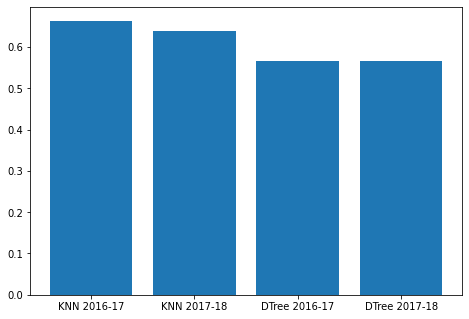

In [29]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

langs = ['KNN 2016-17', 'KNN 2017-18', 'DTree 2016-17', 'DTree 2017-18']
scores = kscore1, kscore2, years_2016_2017_score, years_2017_2018_score

ax.bar(langs,scores)
plt.show()

Our KNN model has outperformed the optimized decision tree on testing data